# Project Scope

This project uses the UCI patient dataset to generate a model to predict diabetic patients at high risk for re-hospitalization

# Data Set Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split


In [2]:
#load the diabetic dataset
diabetic_df = pd.read_csv('./diabetic_data.csv')

print(f'diabetic_data has shape {diabetic_df.shape}')


diabetic_data has shape (101766, 50)


In [3]:
#make a copy for data exploration and cleaning
df = diabetic_df.copy(deep=True)


In [4]:
#take a look at the features datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

## EDA

### Output variable

Here the output variable is the readmitted column

In [24]:
#function to summarize feature
def summarize_feature(dataframe,feature):
    feature_summary = {'values':dataframe[feature].value_counts().index.tolist(),
                     'counts':dataframe[feature].value_counts().values.tolist(),
                     'frequency': dataframe[feature].value_counts(normalize = True).values.tolist()}
    feature_summary = pd.DataFrame(feature_summary)
    return feature_summary


In [25]:
summarize_feature(df, 'readmitted')

,values,counts,frequency
0,NO,54864,0.539119
1,>30,35545,0.349282
2,<30,11357,0.111599


In [6]:
print('\n'+'*'*10 +'readmitted original'+'*'*10)
print(summarize_feature(df, 'readmitted'))

#replace target variable with numerical value
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('NO', 0)

print('\n'+'*'*10 +'readmitted cleaned'+'*'*10)
print(summarize_feature(df, 'readmitted'))



**********readmitted original**********
  values  counts  frequency
0     NO   54864   0.539119
1    >30   35545   0.349282
2    <30   11357   0.111599

**********readmitted cleaned**********
   values  counts  frequency
0       0   90409   0.888401
1       1   11357   0.111599


## Featuring Engineering

Here we will look at all the inputs

### Numerical Features

Numerical features are usually useable as is, no need for further modification.

In [7]:
df.select_dtypes(include=['int64']).columns.tolist()

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmitted']

In [8]:
#converting all categorical numbers to str

df[['encounter_id','patient_nbr', 'admission_type_id','discharge_disposition_id', 'admission_source_id',]] = df[['encounter_id','patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',]].astype(str)
      

In [9]:
#this is a list of all the numerical features
numeric_cols = [
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

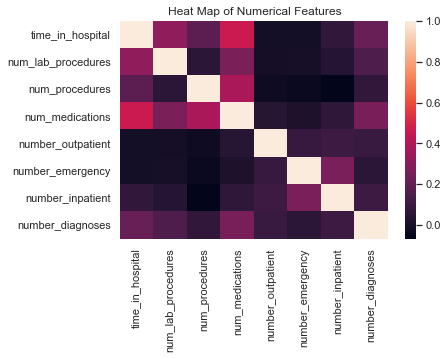

In [18]:
df_numeric = df[numeric_cols].corr()
import seaborn as sns; sns.set()

ax = sns.heatmap(df_numeric)

plt.title('Heat Map of Numerical Features')
plt.title('Heat Map of Numerical Features')

plt.savefig('Heat Map of Numerical Features.png', dpi=300,bbox_inches='tight')


### Categorical Features

In [12]:
df.select_dtypes(include=['object']).columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [13]:
print('\n'+'*'*10 +'race original'+'*'*10)
print(summarize_feature(df, 'race'))

#replace ? with unknown
df.race = df.race.replace({'?':'unknown'})

print('\n'+'*'*10 +'race cleaned'+'*'*10)
print(summarize_feature(df, 'race'))



**********race original**********
            values  counts  frequency
0        Caucasian   76099   0.747784
1  AfricanAmerican   19210   0.188766
2                ?    2273   0.022336
3         Hispanic    2037   0.020017
4            Other    1506   0.014799
5            Asian     641   0.006299

**********race cleaned**********
            values  counts  frequency
0        Caucasian   76099   0.747784
1  AfricanAmerican   19210   0.188766
2          unknown    2273   0.022336
3         Hispanic    2037   0.020017
4            Other    1506   0.014799
5            Asian     641   0.006299


In [14]:
print('\n'+'*'*10 +'gender original'+'*'*10)
print(summarize_feature(df, 'gender'))

#only 3 unknown/invalid, drop rows
df = df[df.gender != 'Unknown/Invalid']

print('\n'+'*'*10 +'gender cleaned'+'*'*10)
print(summarize_feature(df, 'gender'))



**********gender original**********
            values  counts  frequency
0           Female   54708   0.537586
1             Male   47055   0.462384
2  Unknown/Invalid       3   0.000029

**********gender cleaned**********
   values  counts  frequency
0  Female   54708   0.537602
1    Male   47055   0.462398


In [19]:
print('\n'+'*'*10 +'age original'+'*'*10)
print(summarize_feature(df, 'age'))

#convert age feature
dict_age = {'[60-70)': 65, 
            '[40-50)': 45, 
            '[80-90)': 85,
               '[70-80)':75,
               '[50-60)':55,
               '[20-30)':25,
               '[90-100)':95,
               '[30-40)':35,
               '[0-10)':5,
               '[10-20)':15}
df.age.replace(dict_age, inplace=True)

print('\n'+'*'*10 +'age converted'+'*'*10)
summarize_feature(df, 'age'))


SyntaxError: invalid syntax (<ipython-input-19-1b7fe81a1ecb>, line 18)

In [16]:
print('\n'+'*'*10 +'weight original'+'*'*10)
print(summarize_feature(df, 'weight'))

#missing a lot of data, drop column
df = df.drop(['weight'], axis = 1)

print('\n'+'*'*10 +'weight cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'weight'))
except:
    print('Feature does not exist')



**********weight original**********
      values  counts  frequency
0          ?   98566   0.968584
1   [75-100)    1336   0.013129
2    [50-75)     897   0.008815
3  [100-125)     625   0.006142
4  [125-150)     145   0.001425
5    [25-50)      97   0.000953
6     [0-25)      48   0.000472
7  [150-175)      35   0.000344
8  [175-200)      11   0.000108
9       >200       3   0.000029

**********weight cleaned**********
Feature does not exist


In [17]:
print('\n'+'*'*10 +'admission_type_id original'+'*'*10)
print(summarize_feature(df, 'admission_type_id'))

#urgent is used to replace 1,2, and 7 from IDs_mappings
dict_admission_type = {'1': 'urgent', 
            '2':'urgent', 
            '3':'elective',
               '4':'newborn',
               '5':'na',
               '6':'na',
               '7':'urgent',
               '8':'na'}
df.admission_type_id.replace(dict_admission_type, inplace=True)

print('\n'+'*'*10 +'admission_type_id cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'admission_type_id'))
except:
    print('Feature does not exist')



**********admission_type_id original**********
  values  counts  frequency
0      1   53988   0.530527
1      3   18868   0.185411
2      2   18480   0.181598
3      6    5291   0.051993
4      5    4785   0.047021
5      8     320   0.003145
6      7      21   0.000206
7      4      10   0.000098

**********admission_type_id cleaned**********
     values  counts  frequency
0    urgent   72489   0.712332
1  elective   18868   0.185411
2        na   10396   0.102159
3   newborn      10   0.000098


In [18]:
print('\n'+'*'*10 +'discharge_disposition_id original'+'*'*10)
print(summarize_feature(df, 'discharge_disposition_id'))

#11, 13, 14, 19, 20, 21 are patients who are expired so no re-admission possible, drop these rows
expired_list = ['11','13','14','19','20','21']
df = df[~df.discharge_disposition_id.isin(expired_list)]

dict_discharge_disposition_id = {
    '1':'home', 
    '2':'hospital', 
    '3':'assisted',
    '4':'hospital',
    '5':'assisted',
    '6':'home',
    '7':'na',
    '8':'assisted',
    '9':'hospital',
    '10':'hospital',
    '12':'hospital',
    '15':'hospital',
    '16':'hospital',
    '17':'hospital',
    '18':'na',
    '22':'hospital',
    '23':'hospital',
    '24':'assisted',
    '25':'na',
    '26':'na',
    '30':'assisted',
    '27':'assisted',
    '28':'hospital',
    '29':'hospital',}
#amongst the discharge ID, they are broadly categorized into home, assisted (nursing home, homecare aid), another hospital, or NA
df.discharge_disposition_id.replace(dict_discharge_disposition_id, inplace=True)

print('\n'+'*'*10 +'discharge_disposition_id cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'discharge_disposition_id'))
except:
    print('Feature does not exist')



**********discharge_disposition_id original**********
   values  counts  frequency
0       1   60232   0.591885
1       3   13954   0.137123
2       6   12902   0.126785
3      18    3691   0.036271
4       2    2128   0.020911
5      22    1992   0.019575
6      11    1642   0.016136
7       5    1184   0.011635
8      25     989   0.009719
9       4     815   0.008009
10      7     623   0.006122
11     23     412   0.004049
12     13     399   0.003921
13     14     372   0.003656
14     28     139   0.001366
15      8     108   0.001061
16     15      63   0.000619
17     24      48   0.000472
18      9      21   0.000206
19     17      14   0.000138
20     16      11   0.000108
21     19       8   0.000079
22     10       6   0.000059
23     27       5   0.000049
24     12       3   0.000029
25     20       2   0.000020

**********discharge_disposition_id cleaned**********
     values  counts  frequency
0      home   73134   0.736199
1  assisted   15299   0.154006
2  hospital    

In [19]:
print('\n'+'*'*10 +'admission_source_id original'+'*'*10)
print(summarize_feature(df, 'admission_source_id'))

dict_admission_source_id = {
    '1':'referral', 
    '2':'referral', 
    '3':'referral',
    '4':'transfer',
    '5':'transfer',
    '6':'transfer',
    '7':'urgent',
    '8':'other',
    '9':'other',
    '10':'transfer',
    '11':'birth',
    '12':'birth',
    '13':'birth',
    '14':'birth',
    '15':'birth',
    '17':'other',
    '18':'transfer',
    '19':'transfer',
    '20':'other',
    '21':'other',
    '22':'transfer',
    '23':'birth',
    '24':'birth',
    '25':'transfer',
    '26':'transfer'}

#amongst the admission_source_id , they are broadly categorized
df.admission_source_id.replace(dict_admission_source_id, inplace=True)

print('\n'+'*'*10 +'admission_source_id cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'admission_source_id'))
except:
    print('Feature does not exist')




**********admission_source_id original**********
   values  counts  frequency
0       7   55848   0.562190
1       1   29167   0.293608
2      17    6570   0.066137
3       4    3118   0.031387
4       6    2239   0.022539
5       2    1081   0.010882
6       5     806   0.008114
7       3     185   0.001862
8      20     159   0.001601
9       9     125   0.001258
10      8      15   0.000151
11     22      12   0.000121
12     10       8   0.000081
13     11       2   0.000020
14     14       2   0.000020
15     25       2   0.000020
16     13       1   0.000010

**********admission_source_id cleaned**********
     values  counts  frequency
0    urgent   55848   0.562190
1  referral   30433   0.306352
2     other    6869   0.069146
3  transfer    6185   0.062261
4     birth       5   0.000050


In [20]:
summarize_feature(df, 'payer_code')
#missing a lot of data, drop column
df = df.drop(['payer_code'], axis = 1)


In [21]:
summarize_feature(df, 'medical_specialty')
#missing a lot of data, drop column
df = df.drop(['medical_specialty'], axis = 1)


In [22]:
print('\n'+'*'*10 +'diag_1 original'+'*'*10)
print(summarize_feature(df, 'diag_1'))

def code_to_category(icd9code):
    try:
        icd9code = float(icd9code)
        if (icd9code >= 390 and icd9code < 460) or icd9code == 785:
            return 'circulatory'
        if (icd9code >= 460 and icd9code < 520) or icd9code == 786:
            return 'respiratory'
        if (icd9code >= 520 and icd9code < 580) or icd9code == 787:
            return 'digestive'
        if (icd9code >= 250 and icd9code < 251):
            return 'diabetes'
        if (icd9code >= 800 and icd9code < 1000):
            return 'injury'
        if (icd9code >= 710 and icd9code < 740):
            return 'musculoskeletal'
        if (icd9code >= 580 and icd9code < 630) or icd9code == 788:
            return 'genitourinary'
        if (icd9code >= 140 and icd9code < 240) or icd9code == 780 or icd9code == 781 or icd9code == 784 or (icd9code >= 790 and icd9code < 800):
            return 'neoplasms'
        if (icd9code >= 240 and icd9code < 250) or (icd9code >= 251 and icd9code < 280) or (icd9code >= 680 and icd9code < 710) or icd9code == 782:
            return 'neoplasms'
        else:
            return 'other'
    except:
        if (icd9code == '?'):
            return '?'
        return 'other'
    
    
#convert the diag to categorical based on icd codes
df.diag_1 = [code_to_category(x) for x in df['diag_1']]
# df.diag_2 = [code_to_category(x) for x in df['diag_2']]
# df.diag_3 = [code_to_category(x) for x in df['diag_3']]

df = df.drop(['diag_2','diag_3'], axis = 1)

print('\n'+'*'*10 +'diag_1 cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'diag_1'))
except:
    print('Feature does not exist')



**********diag_1 original**********
     values  counts  frequency
0       428    6663   0.067073
1       414    6549   0.065925
2       786    4015   0.040417
3       410    3448   0.034709
4       486    3383   0.034055
5       427    2720   0.027381
6       491    2240   0.022549
7       715    2147   0.021613
8       682    2029   0.020425
9       780    2004   0.020173
10      996    1937   0.019499
11      434    1930   0.019428
12      276    1839   0.018512
13    250.8    1655   0.016660
14      599    1564   0.015744
15       38    1497   0.015069
16      584    1450   0.014596
17      V57    1200   0.012080
18    250.6    1177   0.011848
19      820    1069   0.010761
20      493    1054   0.010610
21      577    1045   0.010519
22      435    1014   0.010207
23      562     985   0.009915
24      574     961   0.009674
25      518     947   0.009533
26      296     895   0.009009
27      560     861   0.008667
28    250.7     854   0.008597
29   250.13     849   0.008546
..

In [23]:
#here we want to note any changes in the dosage of medicine.
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['med_dosage_change'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['med_dosage_change'] = df['med_dosage_change'] + df[colname]
    del df[colname]
#here 0 means no changes in doses of medicine, >0 means there is increase or decrease in dosage


In [24]:
df['number_of_medicine'] = 0
for col in keys:
    df['number_of_medicine'] = df['number_of_medicine'] + df[col].apply(lambda x: 0 if (x == 'No') else 1)
#new column to account for the total number of medicine patient is taking


In [25]:
#these 2 drugs were all 'no', so drop them
df = df.drop(['examide', 'citoglipton'], axis = 1)


## Missing Values

In [42]:
df = df.replace('?', np.nan)
#saw in dataset missing value or unknown has '?', will replace with nan
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values/len(df)*100


#list col with missing values
#diag_2 and diag_3 missing are okay, since diag_1 is present, replace missing with value in diag_1

#drop missing diag_1
# df = df.dropna(subset=['diag_1'])

# df.isnull().sum().sort_values(ascending=False).head(10)


weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
num_procedures               0.000000
max_glu_serum                0.000000
number_diagnoses             0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
num_medications              0.000000
readmitted                   0.000000
num_lab_procedures           0.000000
diabetesMed                  0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
discharge_disposition_id     0.000000
admission_type_id            0.000000
age                          0.000000
gender                       0.000000
patient_nbr                  0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99320 entries, 0 to 101765
Data columns (total 45 columns):
encounter_id                99320 non-null object
patient_nbr                 99320 non-null object
race                        99320 non-null object
gender                      99320 non-null object
age                         99320 non-null int64
admission_type_id           99320 non-null object
discharge_disposition_id    99320 non-null object
admission_source_id         99320 non-null object
time_in_hospital            99320 non-null int64
num_lab_procedures          99320 non-null int64
num_procedures              99320 non-null int64
num_medications             99320 non-null int64
number_outpatient           99320 non-null int64
number_emergency            99320 non-null int64
number_inpatient            99320 non-null int64
diag_1                      99320 non-null object
number_diagnoses            99320 non-null int64
max_glu_serum               99320 non-null object

In [28]:
df.shape

(99320, 45)

dummifying categorical features

In [29]:
df.select_dtypes(include=['object']).columns.tolist()

cat_cols = [
 'race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [30]:
#dummify categorical columns



df_dummified = pd.get_dummies(df, columns=[
 'race','gender','admission_type_id',
 'discharge_disposition_id',
 'admission_source_id','diag_1',
 'max_glu_serum','A1Cresult',
 'metformin','repaglinide','nateglinide',
 'chlorpropamide','glimepiride',
 'acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone',
 'rosiglitazone','acarbose','miglitol',
 'troglitazone','tolazamide','insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change','diabetesMed'],drop_first = True)

#drop_first will drop the first column, meaning if there are 3 categorical, dummy will only make 2. if 0 for both, it will be the 3rd

In [31]:
df_dummified.shape

(99320, 94)

In [32]:
df_dummified.shape

(99320, 94)

In [107]:
df_cleaned = df_dummified.copy(deep=True)


In [108]:
df_cleaned

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2278392,8222157,5,1,41,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,149190,55629189,15,3,59,0,18,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,64410,86047875,25,2,11,5,13,2,0,1,...,0,1,0,0,0,0,0,0,1,1
3,500364,82442376,35,2,44,1,16,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,45,1,51,0,8,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,35754,82637451,55,3,31,6,16,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,55842,84259809,65,4,70,1,21,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,63768,114882984,75,5,73,0,12,0,0,0,...,0,1,0,0,0,0,0,0,1,1
8,12522,48330783,85,13,68,2,28,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9,15738,63555939,95,12,33,3,18,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99320 entries, 0 to 101765
Data columns (total 94 columns):
encounter_id                         99320 non-null object
patient_nbr                          99320 non-null object
age                                  99320 non-null int64
time_in_hospital                     99320 non-null int64
num_lab_procedures                   99320 non-null int64
num_procedures                       99320 non-null int64
num_medications                      99320 non-null int64
number_outpatient                    99320 non-null int64
number_emergency                     99320 non-null int64
number_inpatient                     99320 non-null int64
number_diagnoses                     99320 non-null int64
readmitted                           99320 non-null int64
med_dosage_change                    99320 non-null int64
number_of_medicine                   99320 non-null int64
race_Asian                           99320 non-null uint8
race_Caucasian    

In [111]:
cleaned_df = df_dummified.copy(deep=True)


In [121]:
cleaned_df.to_csv('./cleaned_df.csv')

In [114]:
train_cleaned_df, test_cleaned_df = train_test_split(cleaned_df, test_size=0.15, random_state=123)

print(train_cleaned_df.shape)
print(test_cleaned_df.shape)


(84422, 94)
(14898, 94)


In [115]:
train_cleaned_df.to_csv('./train_cleaned_df.csv', index=False)
test_cleaned_df.to_csv('./test_cleaned_df.csv', index=False)

In [116]:
unique_train_cleaned_df = train_cleaned_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
unique_test_cleaned_df = test_cleaned_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')


In [117]:
unique_train_cleaned_df.to_csv('./unique_train_cleaned_df.csv', index=False)
unique_test_cleaned_df.to_csv('./unique_test_cleaned_df.csv', index=False)


In [122]:
unique_cleaned_df = cleaned_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')


In [123]:
train_unique_cleaned_df, test_unique_cleaned_df = train_test_split(unique_cleaned_df, test_size=0.15, random_state=123)


In [124]:
unique_cleaned_df.to_csv('./unique_cleaned_df.csv', index=False)

train_unique_cleaned_df.to_csv('./train_unique_cleaned_df.csv', index=False)
test_unique_cleaned_df.to_csv('./test_unique_cleaned_df.csv', index=False)


In [103]:
df2_cleaned = df_cleaned.drop_duplicates(subset= ['patient_nbr'], keep = 'first')


In [104]:
df2_cleaned.to_csv('./diabetic_df_cleaned_unique_only')


In [37]:
from sklearn.model_selection import train_test_split


In [88]:
train_df, test_df = train_test_split(df_cleaned, test_size=0.10, random_state=13)


In [51]:
train_cleaned_df.to_csv('./train_cleaned_df.csv', index=False)
test_cleaned_df.to_csv('./test_cleaned_df.csv', index=False)


In [90]:
print(train_cleaned_df.shape)
print(test_cleaned_df.shape)
9932/89388

(89388, 94)
(9932, 94)


0.1111111111111111

In [96]:
unique_train_cleaned_df = train_cleaned_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
unique_test_cleaned_df = test_cleaned_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')



In [92]:
asdafsdf = df_cleaned.drop_duplicates(subset= ['patient_nbr'], keep = 'first')


In [93]:
new_unique_train_cleaned_df, new_unique_train_cleaned_df = train_test_split(asdafsdf, test_size=0.15, random_state=13)


In [94]:
summarize_feature(df_cleaned, 'readmitted')

,values,counts,frequency
0,0,88011,0.886136
1,1,11309,0.113864


In [59]:
summarize_feature(train_cleaned_df, 'readmitted')

,values,counts,frequency
0,0,74837,0.886463
1,1,9585,0.113537


In [95]:
summarize_feature(test_cleaned_df, 'readmitted')

,values,counts,frequency
0,0,8380,0.895395
1,1,979,0.104605


In [97]:
summarize_feature(unique_train_cleaned_df, 'readmitted')

,values,counts,frequency
0,0,59652,0.925167
1,1,4825,0.074833


In [98]:
summarize_feature(unique_test_cleaned_df, 'readmitted')

,values,counts,frequency
0,0,8380,0.895395
1,1,979,0.104605


In [99]:
summarize_feature(new_unique_train_cleaned_df, 'readmitted')

,values,counts,frequency
0,0,54139,0.910175
1,1,5343,0.089825


In [100]:
summarize_feature(new_unique_test_cleaned_df, 'readmitted')

,values,counts,frequency
0,0,12290,0.896557
1,1,1418,0.103443
